## Q1 Coverage Pay EDA 

EDA of a dataset from a small charter school network that rolled out coverage pay for the 2023-2024 school year due to staff shortages and to fiscally incentivize staff to cover classes and other duties at their academic campuses in Quarter 1 (Q1), August 21, 2023 to October 20, 2023

In [1]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
#importing Q1 Coverage Pay dat 
df = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - SQL Coverage Pay Dataset - Q1.csv", parse_dates = ['Date', 'Date of Coverage'] )

#Dropping columns 
df = df.drop(columns = ['Email Address', 'Supervisor','Coverage Approval','Approved/Unapproved'])

In [3]:
#Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 585 non-null    datetime64[ns]
 1   Name                 585 non-null    object        
 2   Employee No          585 non-null    int64         
 3   Date of Coverage     585 non-null    datetime64[ns]
 4   Type of Coverage     585 non-null    object        
 5   Campus               585 non-null    object        
 6   Number of Coverages  585 non-null    int64         
 7   Total Compensation   585 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 36.7+ KB


In [4]:
dups = df[df.duplicated()]
dups

,Date,Name,Employee No,Date of Coverage,Type of Coverage,Campus,Number of Coverages,Total Compensation


There are no duplicates in the dataset.

In [5]:
#Dataset shape
df.shape

(585, 8)

In [6]:
#Total Q1 Coverage Pay
round(sum(df['Total Compensation']),2)

41699.71

In total, 41,699.71 USD of coverage pay was submitted by staff in Q1.

In [7]:
#Total Number of Coverages
sum(df['Number of Coverages'])

1024

In total, 1,024 coverages were submitted by staff in Q1

In [8]:
#Number of unique staff
df['Name'].nunique()

72

There were 72 unique staff members that submitted coverage pay.

In [9]:
#Unique number of coverages
df['Campus'].nunique()

3

There are 3 campuses within the small charter school network.

### Coverage Metrics

In [10]:
#Coverage Metrics
round(df.groupby('Name')['Number of Coverages'].sum().describe())

count     72.0
mean      14.0
std       24.0
min        1.0
25%        1.0
50%        5.0
75%       14.0
max      145.0
Name: Number of Coverages, dtype: float64

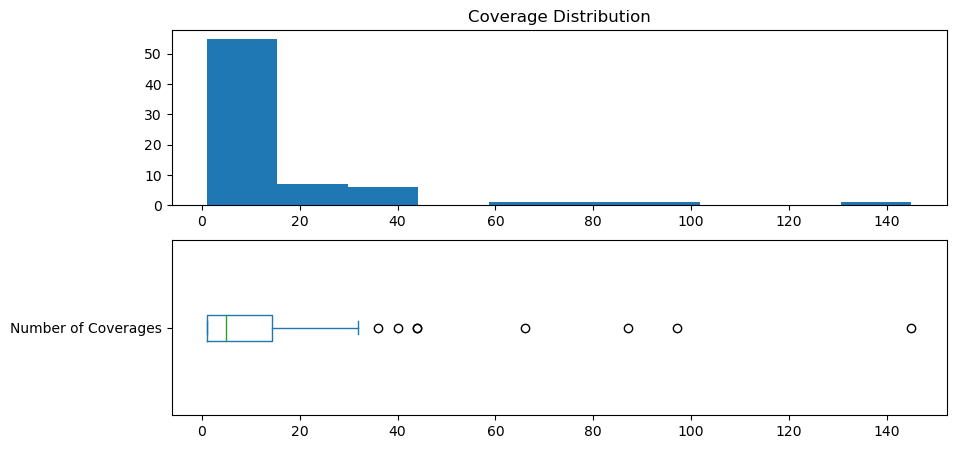

In [11]:
#Creating dataset
coverage_distribution = df.groupby('Name')['Number of Coverages'].sum()

#Creating Subplot
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize = (10,5))

#Plotting data
ax[0].hist(coverage_distribution)
coverage_distribution.plot(kind = 'box', ax = ax[1], vert = False)

#Labels
ax[0].set_title('Coverage Distribution')

plt.show()


In [12]:
#Coverage Submission Outlier Calculation
Coverage_25 = 1
Coverage_75 = 14
IQR = Coverage_75 - Coverage_25 

round(Coverage_75 + (IQR * 1.5))

34

An employee with more than 34 coverages is considered an outlier.

In [13]:
#Counting Outliers
emp_total_coverages = coverage_distribution.reset_index()
emp_total_coverages[emp_total_coverages['Number of Coverages']>= 34].sort_values(by = 'Number of Coverages', ascending = False).shape[0]

8

There were 8 staff members that submitted more than 34 coverages in Q1

In [14]:
coverage_type = df.groupby('Type of Coverage')['Number of Coverages'].sum().sort_values(ascending = False)
coverage_type

Type of Coverage
Non instructional                  310
Class coverage (long term)         269
Class coverage (short term)        246
After School Program (Tutoring)    199
Name: Number of Coverages, dtype: int64

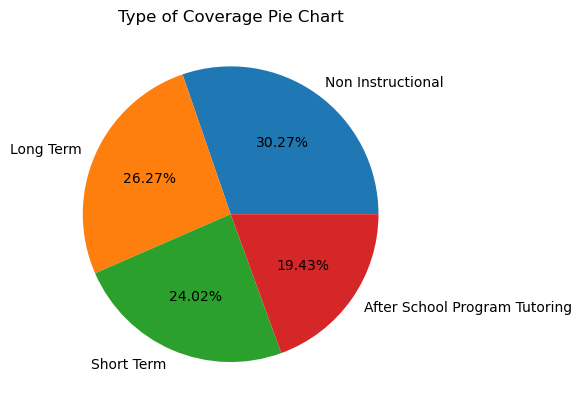

In [15]:
#Plotting Data
coverage_labels = ['Non Instructional', 'Long Term','Short Term', 'After School Program Tutoring']
plt.pie(coverage_type, labels = coverage_labels, autopct = '%.2f%%' )

#Labels
plt.title('Type of Coverage Pie Chart')

#Display
plt.show()

Non Instructional coverages was the most frequent type of coverage submitted in Q1, 310(~30%)

### Compensation Metrics

In [16]:
#Compensation Metrics
round(df.groupby('Name')['Total Compensation'].sum().describe(),2)

count      72.00
mean      579.16
std       914.79
min        25.00
25%        30.00
50%       150.00
75%       636.88
max      4180.00
Name: Total Compensation, dtype: float64

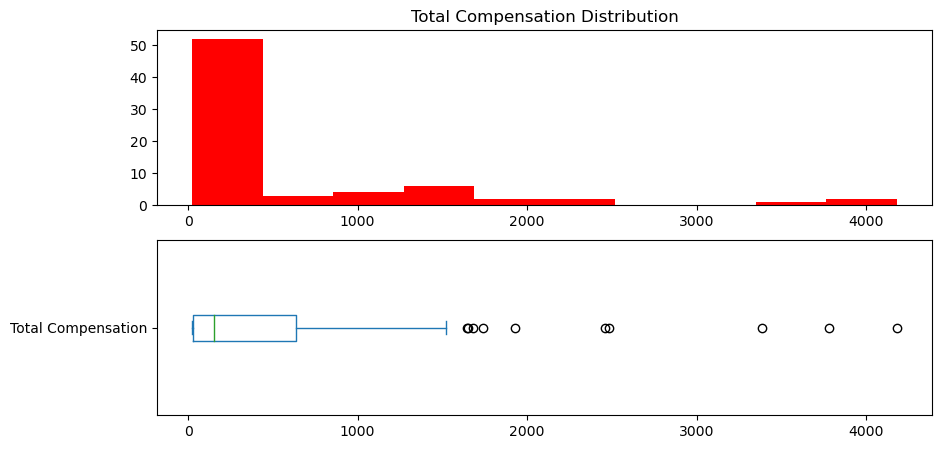

In [17]:
#Creating datset
compensation_distribution = df.groupby('Name')['Total Compensation'].sum()

#Creating subplot
fig, ax = plt.subplots(nrows = 2 , ncols = 1, figsize = (10,5))

#Plotting data
ax[0].hist(compensation_distribution, color = 'red')
compensation_distribution.plot(kind = 'box', vert = False, ax = ax[1])

#Labels 
ax[0].set_title('Total Compensation Distribution')

#Display
plt.show()

In [18]:
#Total Compensation Outlier Calculation
Compensation_25 = 30
Compensation_75 = 636.88
IQR = Compensation_75 - Compensation_25

round(Compensation_75 + (IQR * 1.5),2)

1547.2

In [19]:
#Coutning Compensation Outliers
emp_total_comp = compensation_distribution.reset_index()
emp_total_comp[emp_total_comp['Total Compensation']>= 1547.20 ].shape[0]

10

There were 10 staff members that will received 1,547.20 or more in compensation in Q1.

In [20]:
total_compensation = df.groupby('Type of Coverage')['Total Compensation'].sum().sort_values(ascending = False)
total_compensation

Type of Coverage
After School Program (Tutoring)    15920.00
Class coverage (long term)         10649.71
Non instructional                   7750.00
Class coverage (short term)         7380.00
Name: Total Compensation, dtype: float64

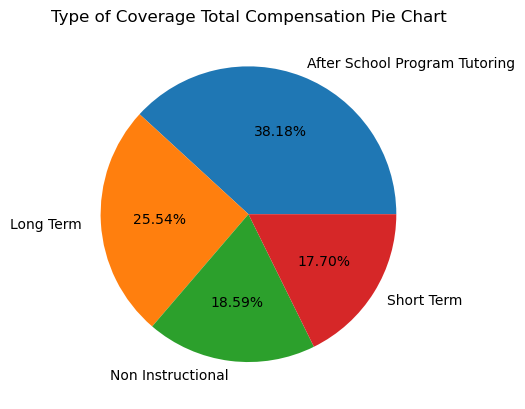

In [21]:
#Plotting data
compensation_labels = ['After School Program Tutoring', 'Long Term ','Non Instructional','Short Term']
plt.pie(total_compensation, labels = compensation_labels, autopct = '%.2f%%')

#labels
plt.title('Type of Coverage Total Compensation Pie Chart')

#Display
plt.show()

After School Program Tutoring was the the type of coverage that cost the most in Q1 despite accounting for ~19% of coverage submissions in Q1.

### Campus Coverage and Compensation Metrics

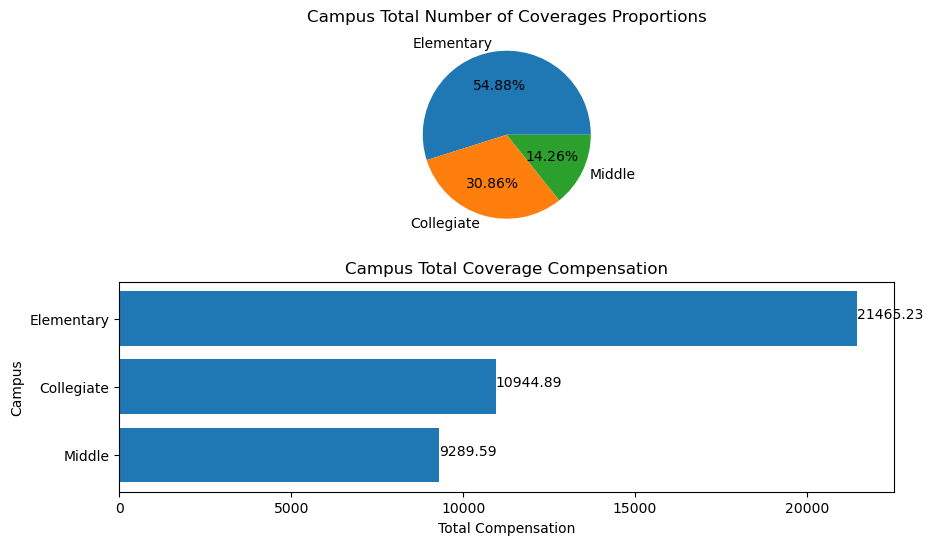

In [22]:
#Data
campus_coverage = df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False)
campus_compensation = round(df.groupby('Campus')['Total Compensation'].sum().sort_values(ascending = True).reset_index(),2)

labels = ['Elementary','Collegiate','Middle']

#Create Subplot
fig,ax = plt.subplots(nrows =2 , ncols = 1, figsize = (10,6))

#Plotting Data
ax[0].pie(campus_coverage, autopct = '%.2f%%', labels = labels)
ax[1].barh(campus_compensation['Campus'], campus_compensation['Total Compensation'])

#Labels
ax[0].set_title('Campus Total Number of Coverages Proportions')
ax[1].set_title('Campus Total Coverage Compensation')
ax[1].set_xlabel('Total Compensation')
ax[1].set_ylabel('Campus')

for index, value in enumerate (campus_compensation['Total Compensation']):
    ax[1].text(value,index,str(value))

Staff at the Elementary Campus submitted 562 coverages (~55%) in Q1. The Elementary Campus also had the highest total compensation in Q1 as well, $21,465.23 